In [2]:
# import of all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# let's import and check the dataset
df = pd.read_csv("KNN_Project_Data") 

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [ ]:
# let's see the distribution of the class in the dataset
sns.pairplot(df,hue="TARGET CLASS")

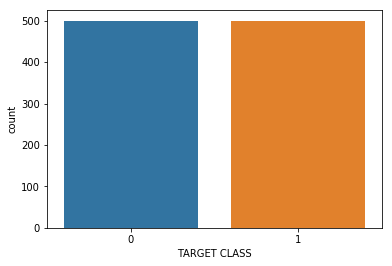

In [7]:
# let's count and plot the number of class occurrences
sns.countplot(x='TARGET CLASS',data=df)

In [8]:
# standard scaler class has to be imported and implemented first
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
scale.fit(df.drop("TARGET CLASS",axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scale.transform(df.drop("TARGET CLASS",axis=1))

In [15]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [16]:
# let's check the rescaled dataset ... seems to be OK
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [17]:
# now we have to split and train the model on the data
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.33)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
prediction = knn.predict(X_test)

In [23]:
# now we have to split and train the 
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# check the accuracy of the model .... app. 71%
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[125  54]
 [ 43 108]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       179
           1       0.67      0.72      0.69       151

   micro avg       0.71      0.71      0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



In [28]:
# we can try to check the error rate by using elbow methos

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [26]:
print(error_rate)

[0.29393939393939394, 0.2696969696969697, 0.23939393939393938, 0.23333333333333334, 0.2, 0.19696969696969696, 0.20303030303030303, 0.19696969696969696, 0.21212121212121213, 0.18181818181818182, 0.20606060606060606, 0.18484848484848485, 0.19090909090909092, 0.18787878787878787, 0.1787878787878788, 0.18787878787878787, 0.2, 0.17575757575757575, 0.18181818181818182, 0.18787878787878787, 0.19393939393939394, 0.19393939393939394, 0.18787878787878787, 0.18181818181818182, 0.19090909090909092, 0.19090909090909092, 0.19393939393939394, 0.19090909090909092, 0.19393939393939394, 0.18484848484848485, 0.19393939393939394, 0.1787878787878788, 0.17575757575757575, 0.1787878787878788, 0.17272727272727273, 0.17575757575757575, 0.17272727272727273, 0.1787878787878788, 0.1696969696969697]


Text(0, 0.5, 'Error Rate')

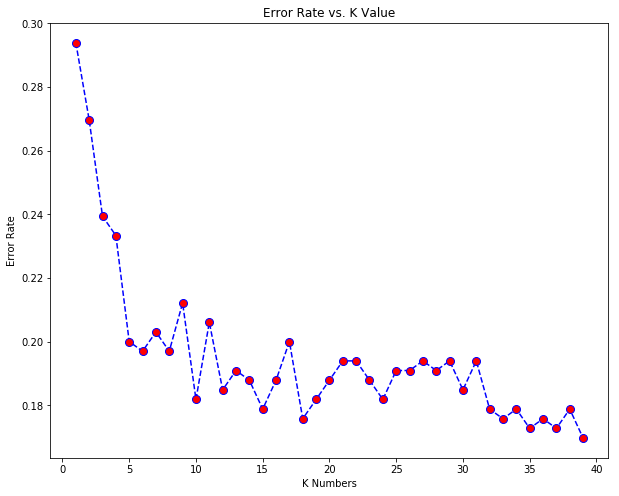

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Numbers')
plt.ylabel('Error Rate')

In [31]:
knn_opt = KNeighborsClassifier(n_neighbors=18)
knn_opt.fit(X_train,y_train)
prediction_opt = knn.predict(X_test)
print(confusion_matrix(y_test,prediction_opt))
print(classification_report(y_test,prediction_opt))

[[139  40]
 [ 16 135]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       179
           1       0.77      0.89      0.83       151

   micro avg       0.83      0.83      0.83       330
   macro avg       0.83      0.84      0.83       330
weighted avg       0.84      0.83      0.83       330



The model accuracy (TP+TN/TP+FP+FN+TN) is 83%. Since the in our case false positives and false negatives are very different,
it is probably more reasonable to take the f1-score into account. Fortunately, it has the same ratio 83%.